In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
# Load the dataset
df=pd.read_csv('happydata.csv')

# Basic Analysis 

In [3]:
df.head()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


In [4]:
# Explore the dataset
print('Dataset shape:',df.shape)
print('columns in Dataset:', df.columns)

Dataset shape: (143, 7)
columns in Dataset: Index(['infoavail', 'housecost', 'schoolquality', 'policetrust',
       'streetquality', 'ëvents', 'happy'],
      dtype='object')


In [5]:
df['happy'].value_counts()

1    77
0    66
Name: happy, dtype: int64

In [6]:
# Check for missing values
df.isnull().sum()

infoavail        0
housecost        0
schoolquality    0
policetrust      0
streetquality    0
ëvents           0
happy            0
dtype: int64

In [7]:
# Check for duplicates
df.duplicated().sum()

18

In [8]:
# Handle duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(125, 7)

In [10]:
df['happy'].value_counts()

1    63
0    62
Name: happy, dtype: int64

In [11]:
df.dtypes

infoavail        int64
housecost        int64
schoolquality    int64
policetrust      int64
streetquality    int64
ëvents           int64
happy            int64
dtype: object

In [12]:
# Define the z-score threshold for outlier detection
z_score_threshold = 3

# Loop through each column and detect outliers
for column in df.columns:
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = np.where(z_scores > z_score_threshold)
    
    print("Column:", column)
    print("Number of outliers:", len(outliers[0]))
    print("Indices of outliers:", outliers[0])
    print()


Column: infoavail
Number of outliers: 1
Indices of outliers: [44]

Column: housecost
Number of outliers: 0
Indices of outliers: []

Column: schoolquality
Number of outliers: 0
Indices of outliers: []

Column: policetrust
Number of outliers: 0
Indices of outliers: []

Column: streetquality
Number of outliers: 0
Indices of outliers: []

Column: ëvents
Number of outliers: 2
Indices of outliers: [ 97 118]

Column: happy
Number of outliers: 0
Indices of outliers: []



In [13]:
# Define the z-score threshold for outlier detection
z_score_threshold = 3

# Create a copy of the dataset
data_no_outliers = df.copy()

# Loop through each column and remove outliers
for column in df.columns:
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = np.where(z_scores > z_score_threshold)
    
    # Remove outliers from the copy of the dataset
    data_no_outliers = data_no_outliers.drop(outliers[0])


# Exploratory Data Analysis

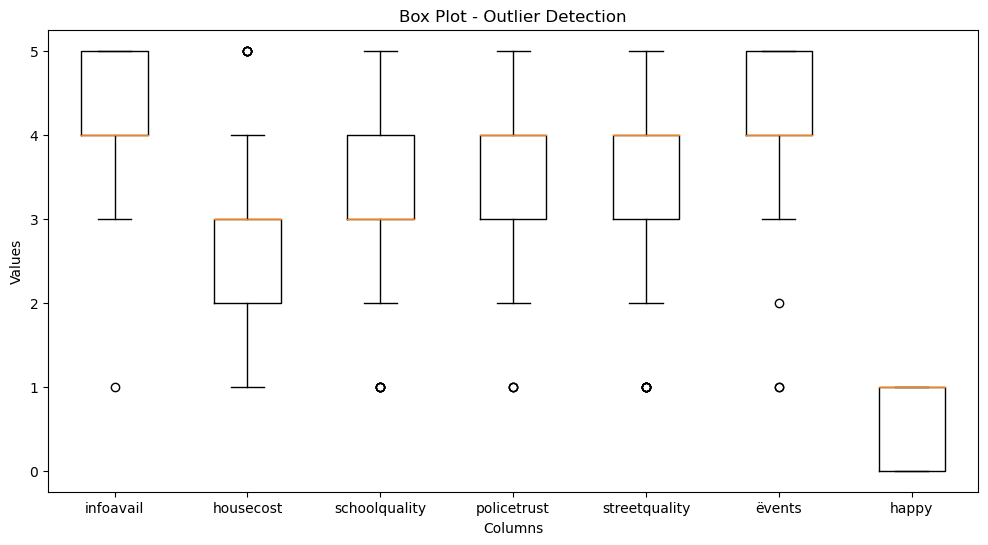

In [14]:
# Create box plots for each column
plt.figure(figsize=(12, 6))
plt.boxplot(df.values, labels=df.columns)
plt.title('Box Plot - Outlier Detection')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

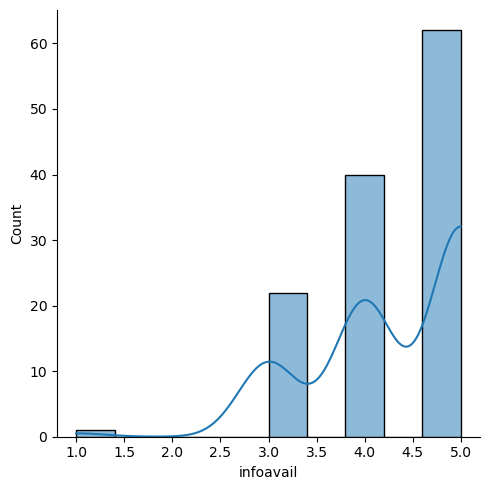

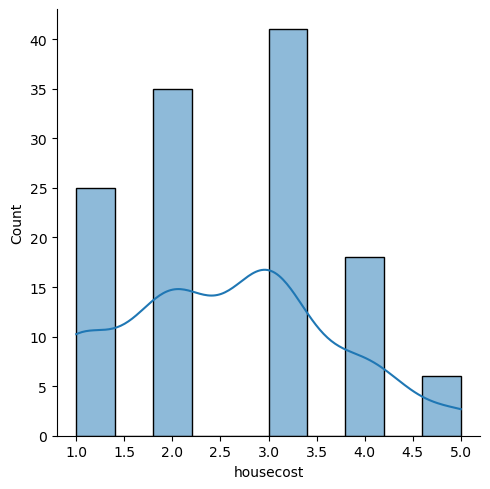

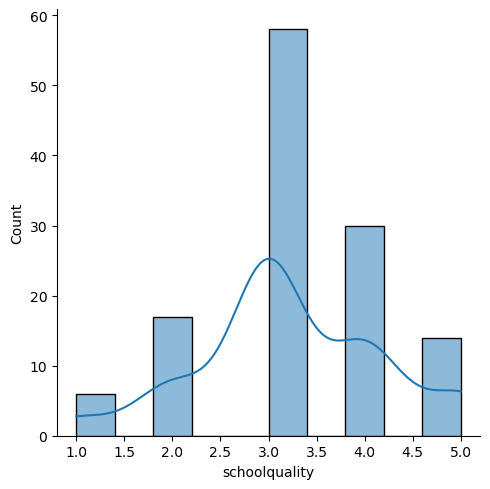

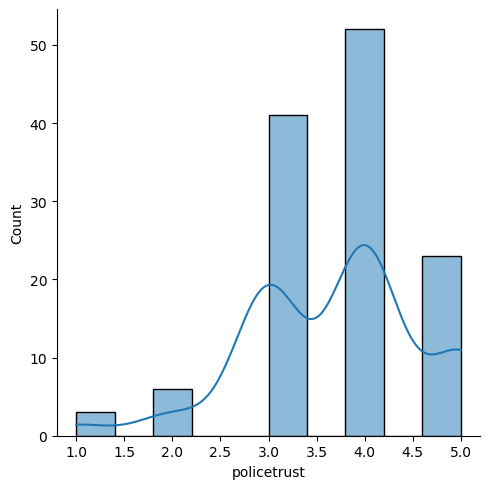

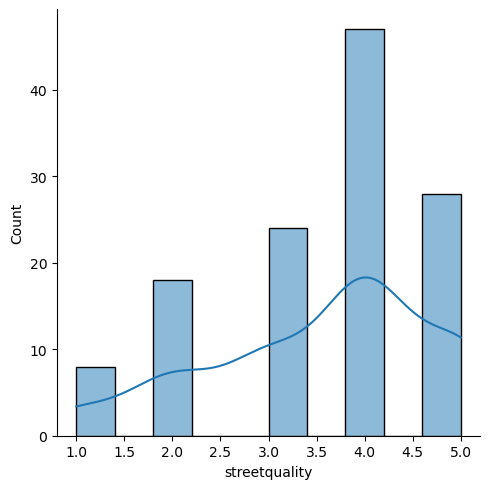

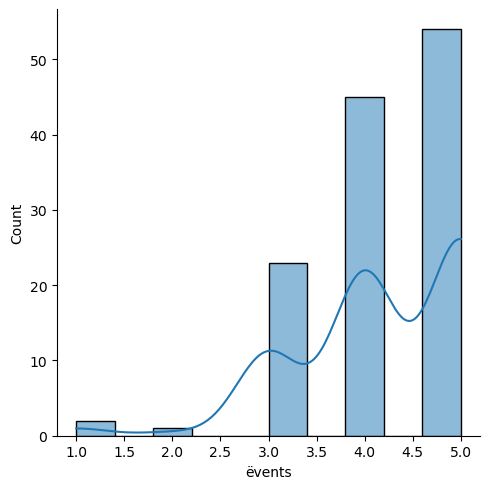

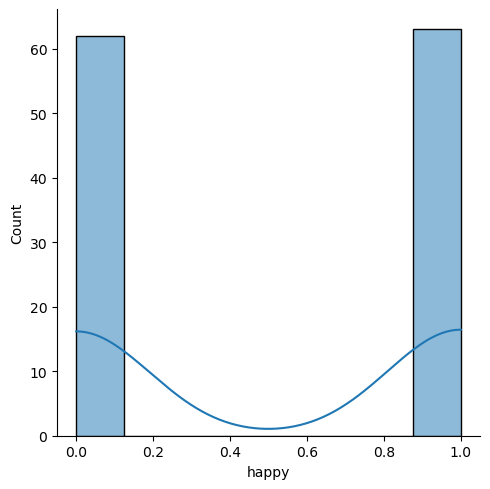

In [15]:
for i in df.columns:
    sns.displot(df[i],kde=True)

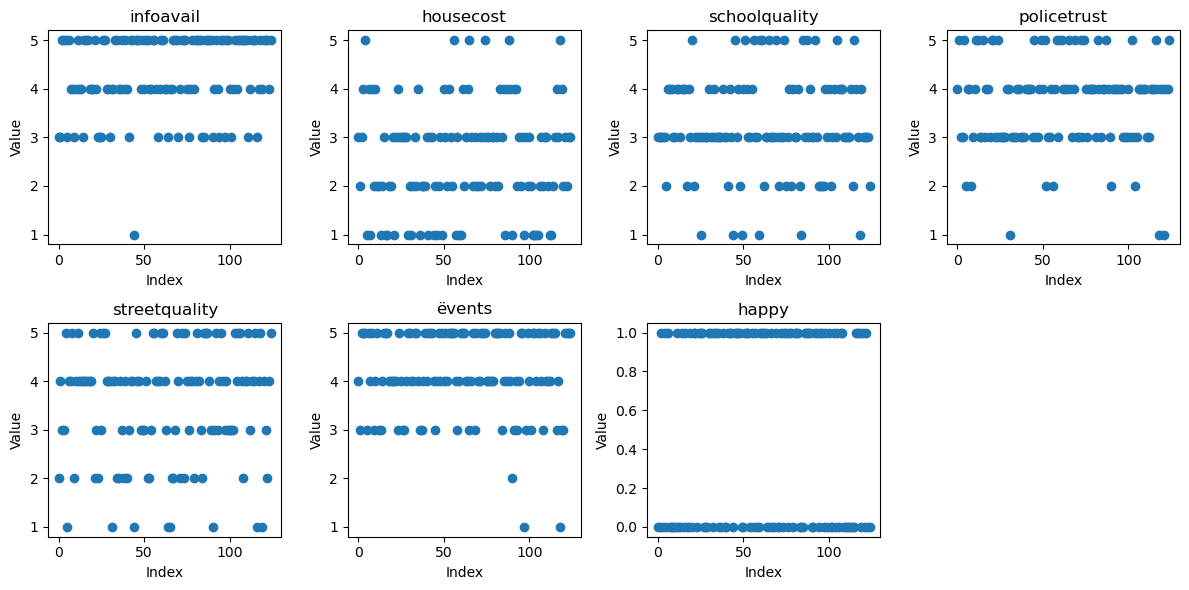

In [16]:
# Create scatter plots for each column
plt.figure(figsize=(12, 6))
for i, column in enumerate(df.columns):
    plt.subplot(2, 4, i+1)
    plt.scatter(range(len(df)), df[column])
    plt.title(column)
    plt.xlabel('Index')
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [17]:
# Calculate descriptive statistics
data_no_outliers.describe()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,4.303279,2.573770,3.237705,3.704918,3.565574,4.188525,0.500000
std,0.811990,1.112796,0.971097,0.915329,1.164117,0.875110,0.502062
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,4.500000,3.000000,3.000000,4.000000,4.000000,4.000000,0.500000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


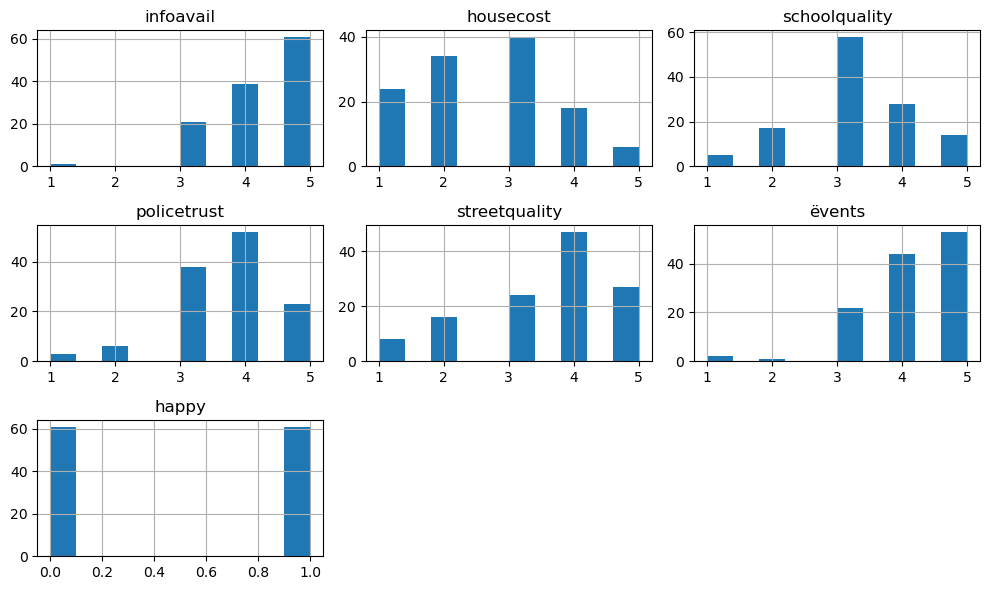

In [18]:
# Create histograms for each variable
data_no_outliers.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

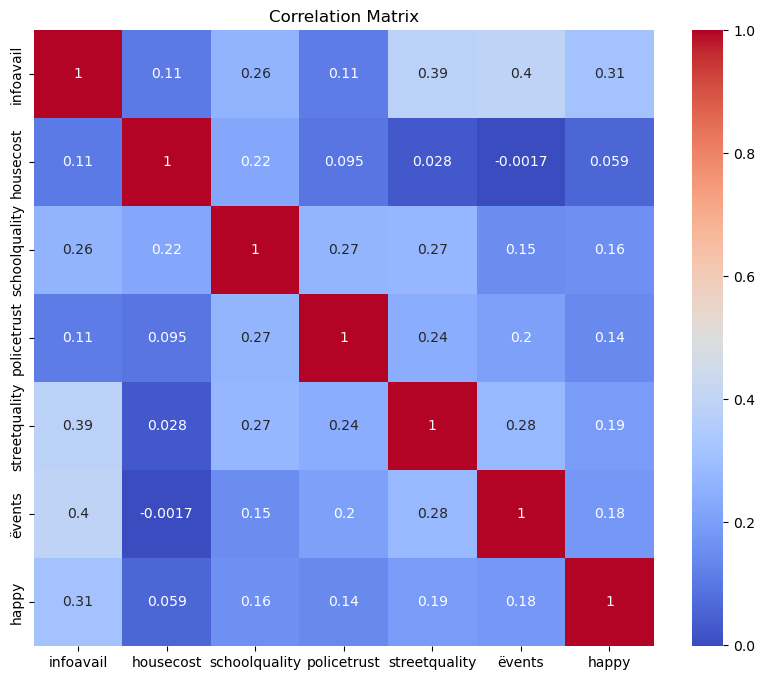

In [19]:
# Calculate the correlation matrix
correlation_matrix = data_no_outliers.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

The 'streetquality' variable has the highest positive correlation with 'infoavail' (0.385) and 'ëvents' (0.284), suggesting a moderate positive relationship.

'ëvents' also has a relatively high positive correlation with 'infoavail' (0.396) and 'streetquality' (0.284).

The 'schoolquality' variable shows moderate positive correlations with 'infoavail' (0.264) and 'policetrust' (0.266).

The 'happy' variable has a moderate positive correlation with 'infoavail' (0.314), 'streetquality' (0.191), and 'ëvents' (0.179).

In [20]:
correlation_matrix

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
infoavail,1.000000,0.107657,0.264172,0.110284,0.385343,0.395726,0.314223
housecost,0.107657,1.000000,0.224544,0.094572,0.028134,-0.001670,0.059170
schoolquality,0.264172,0.224544,1.000000,0.265518,0.274868,0.151056,0.161034
policetrust,0.110284,0.094572,0.265518,1.000000,0.243235,0.204151,0.143870
streetquality,0.385343,0.028134,0.274868,0.243235,1.000000,0.283871,0.190895
ëvents,0.395726,-0.001670,0.151056,0.204151,0.283871,1.000000,0.178697
happy,0.314223,0.059170,0.161034,0.143870,0.190895,0.178697,1.000000


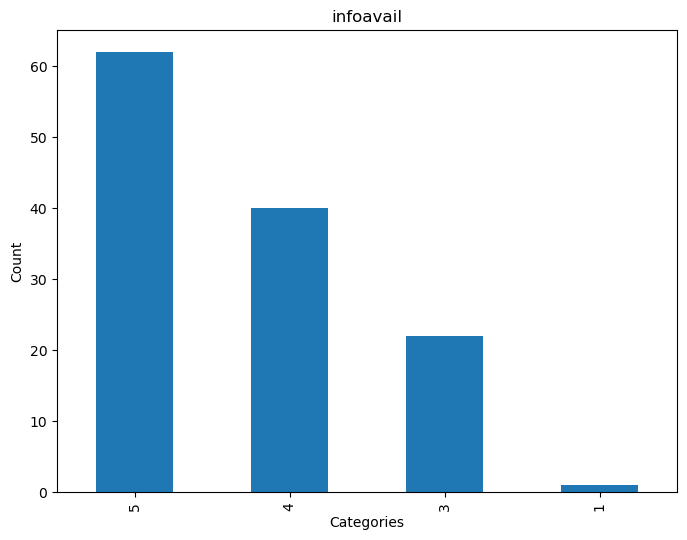

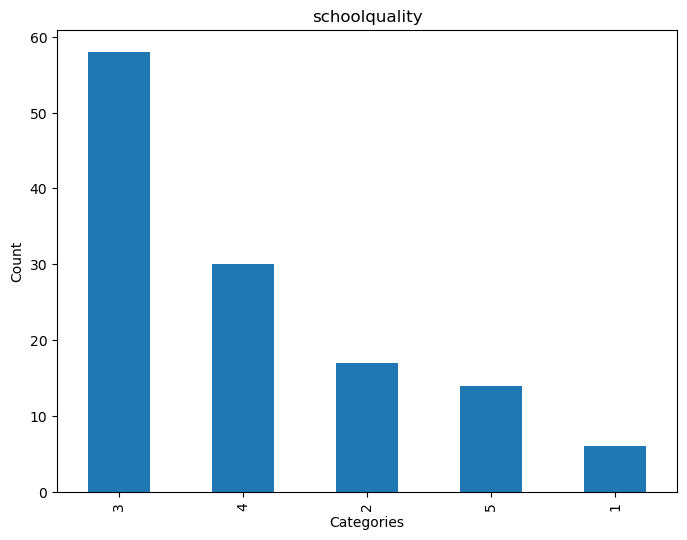

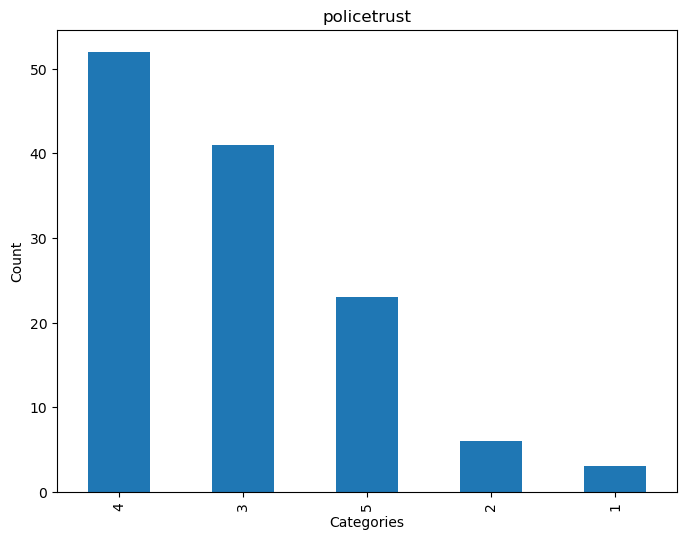

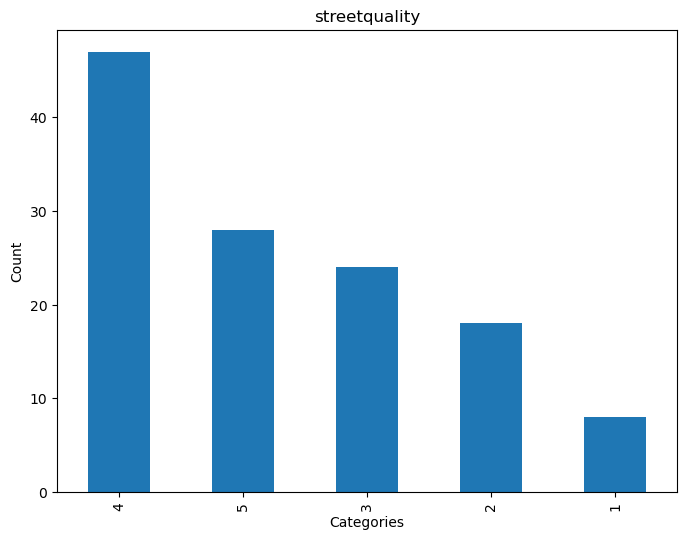

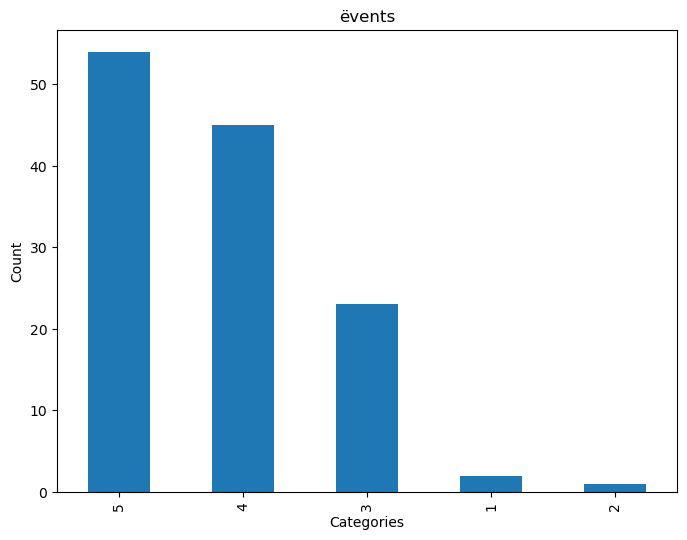

In [21]:
cat_vars = ['infoavail', 'schoolquality', 'policetrust', 'streetquality', 'ëvents']
for var in cat_vars:
    plt.figure(figsize=(8, 6))
    df[var].value_counts().plot(kind='bar')
    plt.title(var)
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.show()

<Figure size 800x600 with 0 Axes>

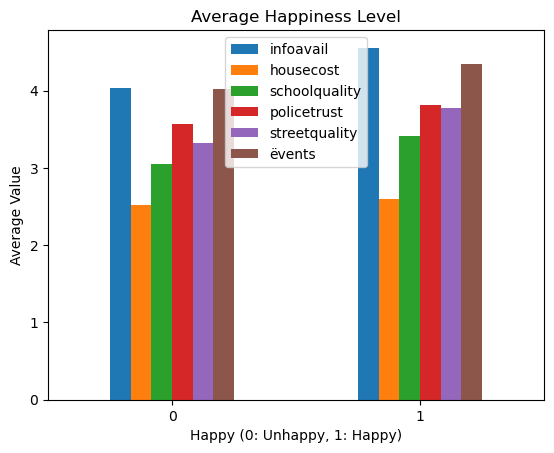

In [22]:
# Bar plots
plt.figure(figsize=(8, 6))
df.groupby('happy').mean().plot(kind='bar')
plt.title('Average Happiness Level')
plt.xlabel('Happy (0: Unhappy, 1: Happy)')
plt.ylabel('Average Value')
plt.legend(loc='upper center')
plt.xticks(rotation=0)
plt.show()

In [23]:
df.head()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
5,5,5,3,5,5,5,1


In [24]:
x=df.drop(['happy'],axis=1)
y=df['happy']

# Split into train & test dataset

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
x_train.shape,x_test.shape

((100, 6), (25, 6))

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
model=RandomForestClassifier()

# Train model

In [29]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0], dtype=int64)

In [31]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.52

# StandardScaler

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()

In [34]:
x_train1=scaler.fit_transform(x_train)
x_test1=scaler.transform(x_test)

# Train the model

In [35]:
model.fit(x_train1,y_train)

RandomForestClassifier()

In [36]:
y_pred=model.predict(x_test1)

In [37]:
mean_squared_error(y_test,y_pred)

0.56

# Gradient Boosting Classifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
modelgb=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3)

# Train the model

In [40]:
modelgb.fit(x_train1,y_train)

GradientBoostingClassifier()

In [41]:
modelgb.score(x_test1,y_test)

0.56

In [42]:
y_pred=modelgb.predict(x_test)

C:\Users\Lenovo\ab\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [43]:
mean_squared_error(y_test,y_pred)

0.48

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

# PCA

In [45]:
pca=PCA(n_components=3)

x_train_pca=pca.fit_transform(x_train1)
x_test_pca=pca.transform(x_test1)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.34488117, 0.19107543, 0.15056404])

# Train model

In [46]:
model_dtc=DecisionTreeClassifier()

In [47]:
model_dtc.fit(x_train_pca,y_train)

DecisionTreeClassifier()

In [48]:
model_dtc.score(x_test_pca,y_test)

0.6

In [49]:
y_pred_pca=model_dtc.predict(x_test_pca)

In [50]:
mean_squared_error(y_test,y_pred_pca)

0.4

# Apply GridSearch 

In [51]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=2)

In [52]:
#Hyperameter tuning
param_grid={
    'n_estimators': [200,400],
    'max_features': ['auto','sqrt','log2'],
    'max_depth': [4,5,6,7,8]
}

In [53]:
grid_search=GridSearchCV(model,param_grid=param_grid,n_jobs=1)

In [54]:
grid_search.fit(x_train,y_train)

C:\Users\Lenovo\ab\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Lenovo\ab\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Lenovo\ab\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassi

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 400]})

In [55]:
y_pred_g=grid_search.predict(x_test)

In [56]:
mean_squared_error(y_test,y_pred_g)

0.36